In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_csv("Assignment Data/fake reviews dataset.csv")

# Data Exploration

In [7]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [9]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [10]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [11]:
df['category'].value_counts()

category
Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: count, dtype: int64

In [12]:
df['label'].value_counts()

label
CG    20216
OR    20216
Name: count, dtype: int64

In [13]:
df['rating'].value_counts()

rating
5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64

In [14]:
df.duplicated().sum()

12

In [15]:
df[df.duplicated()]

,category,rating,label,text_
6025,Sports_and_Outdoors_5,5.0,CG,"This is a really good starter kit, with lots o..."
6708,Sports_and_Outdoors_5,5.0,CG,"Great, no complaints. Comfortable, phone fits ..."
12548,Movies_and_TV_5,5.0,CG,One of the best movies of the year. Not for e...
19802,Pet_Supplies_5,5.0,CG,My dog loves these and it has kept her occupie...
20242,Pet_Supplies_5,5.0,CG,My dog loves it and it has kept her occupied f...
22305,Pet_Supplies_5,5.0,OR,Got these to give to my 8 mth old chihuahua wh...
26444,Kindle_Store_5,5.0,CG,I received this story as an ARC in exchange fo...
27233,Kindle_Store_5,5.0,CG,This is the first book in a series by the auth...
29203,Books_5,5.0,CG,I really enjoyed this book. The characters wer...
33602,Toys_and_Games_5,5.0,CG,I got this for my son for Christmas. He loved...


In [16]:
df[df['text_'] == 'This is a really good starter kit, with lots of tools and a lot of options. The other two I had to replace, both with different basic tools, were great.']

,category,rating,label,text_
6018,Sports_and_Outdoors_5,5.0,CG,"This is a really good starter kit, with lots o..."
6025,Sports_and_Outdoors_5,5.0,CG,"This is a really good starter kit, with lots o..."


In [17]:
df[df['text_'] == 'This is the first book in a series by the author I have read that I have been following.\n\nI had a lot of fun with this book and I am definitely looking forward to reading the next one.\n\nI received this book for free in exchange for an honest review.I was looking forward to reading the book, but the last part was so repetitive that I could not get into the book. I am glad I did.I enjoyed this book. I love how the heroine is a strong heroine who is strong. I liked how she was able to fight off the pain and']

,category,rating,label,text_
27232,Kindle_Store_5,5.0,CG,This is the first book in a series by the auth...
27233,Kindle_Store_5,5.0,CG,This is the first book in a series by the auth...


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
print(f'Number of duplicates: {df.duplicated().sum()}')
print(f'shape: {df.shape}')

Number of duplicates: 0
shape: (40420, 4)


In [20]:
df.rename(columns = { 'text_' : 'text'}, inplace = True)
df

,category,rating,label,text
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [21]:
replace_map = {
    'Home_and_Kitchen_5': 'Home_and_Kitchen',
    'Kindle_Store_5': 'Kindle_Store',
    'Books_5': 'Books',
    'Pet_Supplies_5': 'Pet_Supplies',
    'Electronics_5': 'Electronics',
    'Sports_and_Outdoors_5': 'Sports_and_Outdoors',
    'Tools_and_Home_Improvement_5': 'Tools_and_Home_Improvement',
    'Clothing_Shoes_and_Jewelry_5': 'Clothing_Shoes_and_Jewelry',
    'Toys_and_Games_5': 'Toys_and_Games',
    'Movies_and_TV_5': 'Movies_and_TV'
}

for old_value, new_value in replace_map.items():
    df = df.replace(old_value, new_value, regex=True)

# Data Cleaning

In [22]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [23]:
df['text'][0], clean_text(df['text'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [24]:
df['text'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text, dtype: object

In [25]:
df.shape

(40420, 4)

In [26]:

df['text'] = df['text'].astype(str)

In [27]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [28]:
preprocess(df['text'][4])

'Very nice set Good quality We set two months'

In [29]:
df['text'][:10000] = df['text'][:10000].apply(preprocess)
df['text'][10001:20000] = df['text'][10001:20000].apply(preprocess)
df['text'][20001:30000] = df['text'][20001:30000].apply(preprocess)
df['text'][30001:40000] = df['text'][30001:40000].apply(preprocess)
df['text'][40001:40432] = df['text'][40001:40432].apply(preprocess) 

In [30]:
df['text'] = df['text'].str.lower()

In [31]:
df.head()

,category,rating,label,text
0,Home_and_Kitchen,5.0,CG,love well made sturdy comfortable i love very ...
1,Home_and_Kitchen,5.0,CG,love great upgrade original i 've mine couple ...
2,Home_and_Kitchen,5.0,CG,this pillow saved back i love look feel pillow
3,Home_and_Kitchen,1.0,CG,missing information use great product price i
4,Home_and_Kitchen,5.0,CG,very nice set good quality we set two months


In [32]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text'] = df['text'].apply(lambda x: stem_words(x))

In [33]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text"] = df["text"].apply(lambda text: lemmatize_words(text))

In [34]:
df['text'].head()

0    love well made sturdi comfort i love veri pretti
1      love great upgrad origin i 've mine coupl year
2        thi pillow save back i love look feel pillow
3               miss inform use great product price i
4         veri nice set good qualiti we set two month
Name: text, dtype: object

In [35]:
df.to_csv('preprocessed.csv')

In [4]:
new_df = pd.read_csv('Assignment Data/preprocessed.csv')

In [5]:
new_df.head()

,Unnamed: 0,category,rating,label,text
0,0,Home_and_Kitchen,5.0,CG,love well made sturdi comfort i love veri pretti
1,1,Home_and_Kitchen,5.0,CG,love great upgrad origin i 've mine coupl year
2,2,Home_and_Kitchen,5.0,CG,thi pillow save back i love look feel pillow
3,3,Home_and_Kitchen,1.0,CG,miss inform use great product price i
4,4,Home_and_Kitchen,5.0,CG,veri nice set good qualiti we set two month


In [7]:
new_df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
new_df.head()

,category,rating,label,text
0,Home_and_Kitchen,5.0,CG,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen,5.0,CG,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen,5.0,CG,thi pillow save back i love look feel pillow
3,Home_and_Kitchen,1.0,CG,miss inform use great product price i
4,Home_and_Kitchen,5.0,CG,veri nice set good qualiti we set two month


In [10]:
new_df.dropna(inplace=True)
new_df['length'] = df['text_'].apply(len)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40419 entries, 0 to 40419
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40419 non-null  object 
 1   rating    40419 non-null  float64
 2   label     40419 non-null  object 
 3   text      40419 non-null  object 
 4   length    40419 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


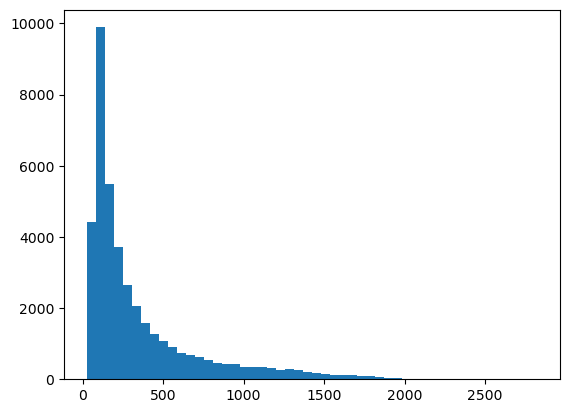

In [11]:
plt.hist(new_df['length'],bins=50)
plt.show()

In [12]:
new_df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20204.0  4.259503  1.141272  1.0  4.0  5.0  5.0  5.0  20204.0   
OR     20215.0  4.253228  1.147668  1.0  4.0  5.0  5.0  5.0  20215.0   

                                                                   
             mean         std   min    25%    50%     75%     max  
label                                                              
CG     345.960453  367.625737  35.0   98.0  187.0  442.25  2827.0  
OR     355.845362  370.720619  24.0  117.0  207.0  433.00  2662.0

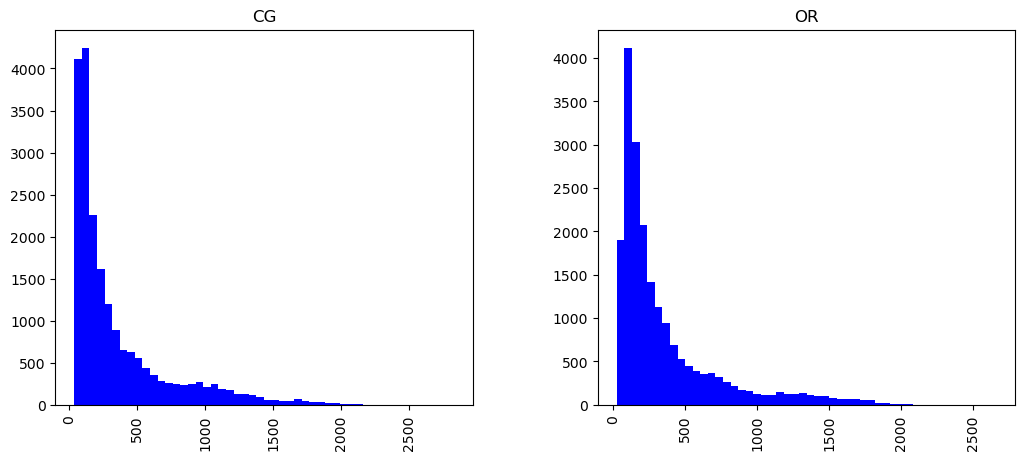

In [13]:
new_df.hist(column='length',by='label',bins=50,color='blue',figsize=(12,5))
plt.show()

In [17]:
new_df[new_df['label']=='OR'][['text','length']].sort_values(by='length',ascending=False).head().iloc[0].text

"these bag much larger i expect it 's sinc i 've purchas i n't recal big they job make pick pup 's mess lot easier whole lot sanitari especi elderli father he time tri pick toilet paper without get someth el ..... must have item hous sinc 's live thi also save money toilet paper my pup train use potti pad insid also go outsid he 's pomeranian i train way rain snow abl go indoor it 's nice get bundl winter brave cold snow ice they 've alreadi come handi last long time i know get run the contain keep small easi clip belt loop leash abl grab one easili the bag also good thick some i 've purchas past littl thinner if pooch need pick great hand they slight odor i think 's plastic it 's terribl notic upon open box they n't scent perfum thank good i abl purchas bag discount free test review regardless price paid bear actual opinion product i rate 1-5 rate i would purchas"

In [19]:
new_df.length.describe()

count    40419.000000
mean       350.904253
std        369.205359
min         24.000000
25%        107.000000
50%        198.000000
75%        438.000000
max       2827.000000
Name: length, dtype: float64

In [20]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [21]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x0000022CDAA34A40>)

In [23]:
bow_transformer.fit(new_df['text'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 34446


In [25]:
review4 = new_df['text'][3]
review4

'miss inform use great product price i'

In [26]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 13599)	1
  (0, 15841)	1
  (0, 19848)	1
  (0, 23845)	1
  (0, 23975)	1
  (0, 32177)	1
(1, 34446)


In [30]:
print(bow_transformer.get_feature_names_out()[15841])
print(bow_transformer.get_feature_names_out()[23848])

inform
pricegreatthi


In [31]:
bow_reviews = bow_transformer.transform(new_df['text'])

In [32]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40419, 34446)
Amount of non zero values in the bag of words model: 1013732


In [33]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.07


In [34]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 13599)	1
  (0, 15841)	1
  (0, 19848)	1
  (0, 23845)	1
  (0, 23975)	1
  (0, 32177)	1


In [35]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

10.913932810397666
2.8218463673448824


In [36]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40419, 34446)
No. of Dimensions: 2
